In [1]:
# INTERACTIVE PLOTS (only if you code locally, unfortunately)
# This cell can take some minutes to run
# You should only need to run this cell once and not everytime you open the script
# In case the plotting of the data below does not work because of the error "Error displaying widget: model not found"
# you'll probably have to restart your kernel once more.

# IMPORTANT: After running this cell, restart your kernel
# uncomment the next two lines for interactive plots
!pip install install nodejs

In [2]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\jupyterlab\debuglog.py:57: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
C:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\jupyterlab\debuglog.py:58: UserWarning: See the log file for details: C:\Users\oliwi\AppData\Local\Temp\jupyterlab-debug-r7g

In [1]:
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

# Reading sensor data from PKL file

Create an instance of the <code>Recording</code> class that manages the data from a file

In [3]:
recording = Recording('../data/train/train_trace_013.pkl')

# The data is stored inside a dictionary (access: recording.data["key"])
print("\r\nAvailable data traces:")
print(list(recording.data.keys()))

if not(recording.labels is None):
    print("\r\nLabels: ")
    print(recording.labels)

print(f"\r\nRecording:")
for key in list(recording.data.keys()):
    print(f'{key}: {recording.data[key]}')


Available data traces:
['phone_mx', 'gx', 'altitude', 'note', 'phone_rotx', 'phone_steps', 'longitude', 'phone_gravy', 'lostPackets', 'phone_gz', 'latitude', 'phone_my', 'timestamp', 'gz', 'ax', 'my', 'phone_pressure', 'phone_gravx', 'phone_gy', 'phone_orientationx', 'temperature', 'phone_az', 'mz', 'az', 'gy', 'phone_mz', 'phone_rotm', 'phone_ax', 'packetNumber', 'phone_orientationz', 'phone_gravz', 'speed', 'bearing', 'phone_gx', 'phone_lax', 'phone_laz', 'phone_rotz', 'ay', 'phone_roty', 'phone_lay', 'mx', 'phone_ay', 'phone_orientationy']

Labels: 
{'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 2}

Recording:
phone_mx: Trace(title='phone_mx', total_time=555.18, samplerate=100.79, max_update_gap=0.11)
gx: Trace(title='gx', total_time=555.18, samplerate=199.84, max_update_gap=0.03)
altitude: Trace(title='altitude', total_time=555.18, samplerate=12.49, max_update_gap=1.14)
note: Trace(title='note', total_time=555.18, samplerate=0.00, max_update_gap=inf)


c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


phone_rotx: Trace(title='phone_rotx', total_time=555.18, samplerate=100.79, max_update_gap=0.11)
phone_steps: Trace(title='phone_steps', total_time=555.18, samplerate=12.49, max_update_gap=8.84)
longitude: Trace(title='longitude', total_time=555.18, samplerate=12.49, max_update_gap=1.14)
phone_gravy: Trace(title='phone_gravy', total_time=555.18, samplerate=100.79, max_update_gap=0.11)
lostPackets: Trace(title='lostPackets', total_time=555.18, samplerate=12.49, max_update_gap=555.13)
phone_gz: Trace(title='phone_gz', total_time=555.18, samplerate=100.79, max_update_gap=0.11)
latitude: Trace(title='latitude', total_time=555.18, samplerate=12.49, max_update_gap=1.14)
phone_my: Trace(title='phone_my', total_time=555.18, samplerate=100.79, max_update_gap=0.11)
timestamp: Trace(title='timestamp', total_time=555.18, samplerate=12.49, max_update_gap=0.27)
gz: Trace(title='gz', total_time=555.18, samplerate=199.84, max_update_gap=0.02)
ax: Trace(title='ax', total_time=555.18, samplerate=199.84,

In [ ]:
recording.data['altitude']

Trace(title='altitude', total_time=555.18, samplerate=12.49, max_update_gap=1.14)

In [6]:
recording.data['note']

Trace(title='note', total_time=555.18, samplerate=0.00, max_update_gap=inf)

In [7]:
print("ACTIVITIES")
for activity in Activity:
    if activity.value in recording.labels["activities"]:
        print(f"{activity.name} is contained in the recording, thus '{activity.name.lower()}': True")
    else:
        print(f"{activity.name} is NOT contained in the recording, thus '{activity.name.lower()}': False")

print("\r\nWATCH LOCATION")
print(f"The LilyGo was worn on the {WatchLocation(recording.labels['watch_loc']).name.lower()}.")

print("\r\nPATH IDX")
print(f"The participant completed {Path(recording.labels['path_idx']).name.lower()}.")

print("\r\nSTEP COUNT")
if "step_count" in recording.labels:
    print(f"The participant performed {recording.labels['step_count']} steps.")
else:
    print("The step count is not available.")


ACTIVITIES
STANDING is NOT contained in the recording, thus 'standing': False
WALKING is contained in the recording, thus 'walking': True
RUNNING is NOT contained in the recording, thus 'running': False
CYCLING is NOT contained in the recording, thus 'cycling': False

WATCH LOCATION
The LilyGo was worn on the ankle.

PATH IDX
The participant completed path_2.

STEP COUNT
The participant performed None steps.


## Working with timeseries
Every value in this dictionary holds a <code>Trace</code> object to manage the data from one sensor

In [8]:
recording = Recording('data/example/medium_walk.pkl')  # Second example file: data/example/short_walk.pkl

# X-axis of the LILYGO accelerometer
ax = recording.data['ax']

print(f"Name of sensor: '{ax.title}'")
print(f"Sample rate: {int(ax.samplerate)} Hz")
print(f"Recording length: {ax.total_time} seconds")
print(f"Timestamp of recording: {ax.raw_timestamps[0][1]}")
print("\nGetting a time series:")
print(" Time           x-Accel")
for x, t in list(zip(ax.timestamps, ax.values))[:20]:
    print(f"{x: .3f}s \t{t:.5f}g")

Name of sensor: 'ax'
Sample rate: 200 Hz
Recording length: 136.789 seconds
Timestamp of recording: 1645184293057

Getting a time series:
 Time           x-Accel
 0.000s 	-0.41138g
 0.005s 	-0.40381g
 0.010s 	-0.38452g
 0.015s 	-0.35645g
 0.020s 	-0.32031g
 0.025s 	-0.29248g
 0.030s 	-0.25635g
 0.035s 	-0.21118g
 0.040s 	-0.17676g
 0.045s 	-0.16138g
 0.050s 	-0.14624g
 0.055s 	-0.13989g
 0.060s 	-0.14624g
 0.065s 	-0.14209g
 0.070s 	-0.15576g
 0.075s 	-0.16821g
 0.080s 	-0.17773g
 0.085s 	-0.19019g
 0.090s 	-0.19946g
 0.095s 	-0.20752g


In [9]:
note = recording.data['phone_ax']
for x, t in list(zip(ax.timestamps, ax.values))[:20]:
    print(f"{x: .3f}s \t{t:.5f}g")

 0.000s 	-0.41138g
 0.005s 	-0.40381g
 0.010s 	-0.38452g
 0.015s 	-0.35645g
 0.020s 	-0.32031g
 0.025s 	-0.29248g
 0.030s 	-0.25635g
 0.035s 	-0.21118g
 0.040s 	-0.17676g
 0.045s 	-0.16138g
 0.050s 	-0.14624g
 0.055s 	-0.13989g
 0.060s 	-0.14624g
 0.065s 	-0.14209g
 0.070s 	-0.15576g
 0.075s 	-0.16821g
 0.080s 	-0.17773g
 0.085s 	-0.19019g
 0.090s 	-0.19946g
 0.095s 	-0.20752g


: 

# Plotting

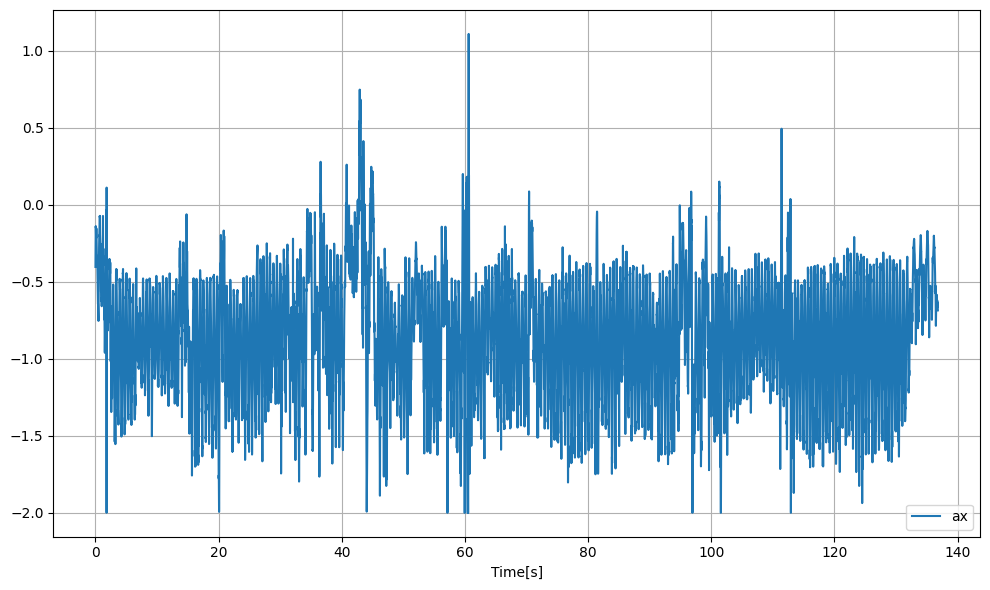

In [6]:
# Display a simple plot
recording.plot(['ax'])

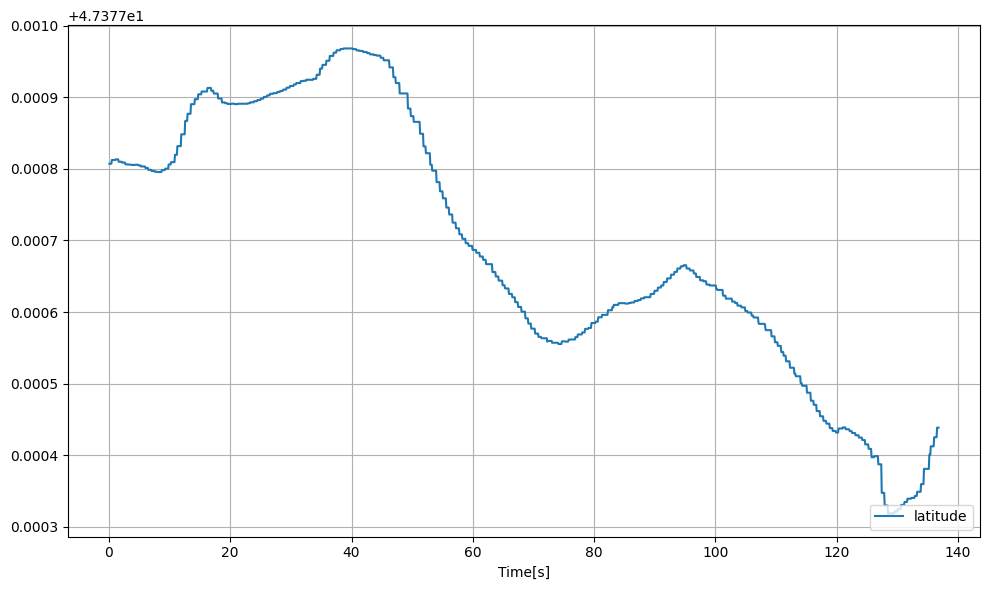

In [7]:
recording.plot('latitude')

In [8]:
recording.data["note"]

KeyError: 'note'

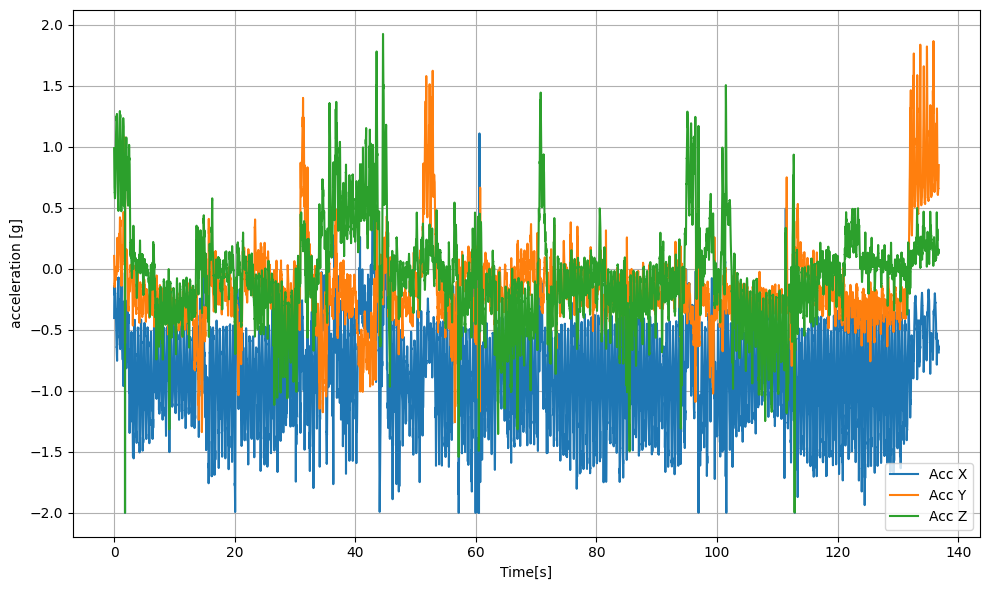

In [8]:
# Plot multiple axes at the same time
# It's also possible to give titles to the y-axis and plots
recording.plot(['ax', 'ay', 'az'], ylabels=['acceleration [g]'], labels=['Acc X', 'Acc Y', 'Acc Z'])

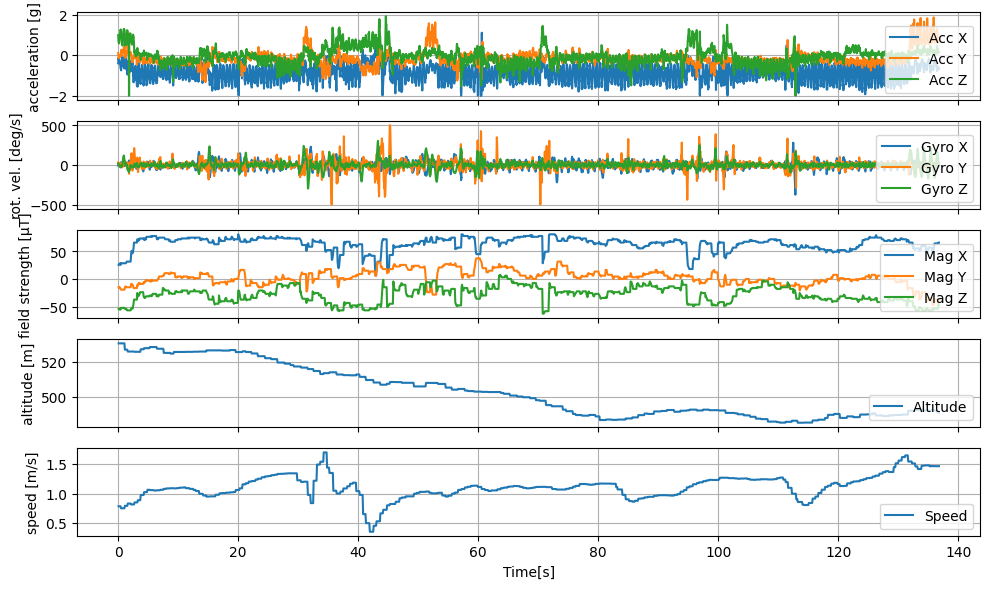

In [9]:
# Plot multiple sensors and multiple axes at the same time
recording.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
             ylabels=['acceleration [g]', 'rot. vel. [deg/s]', 'field strength [µT]', 'altitude [m]', 'speed [m/s]'],
             labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['Altitude'], ['Speed']])

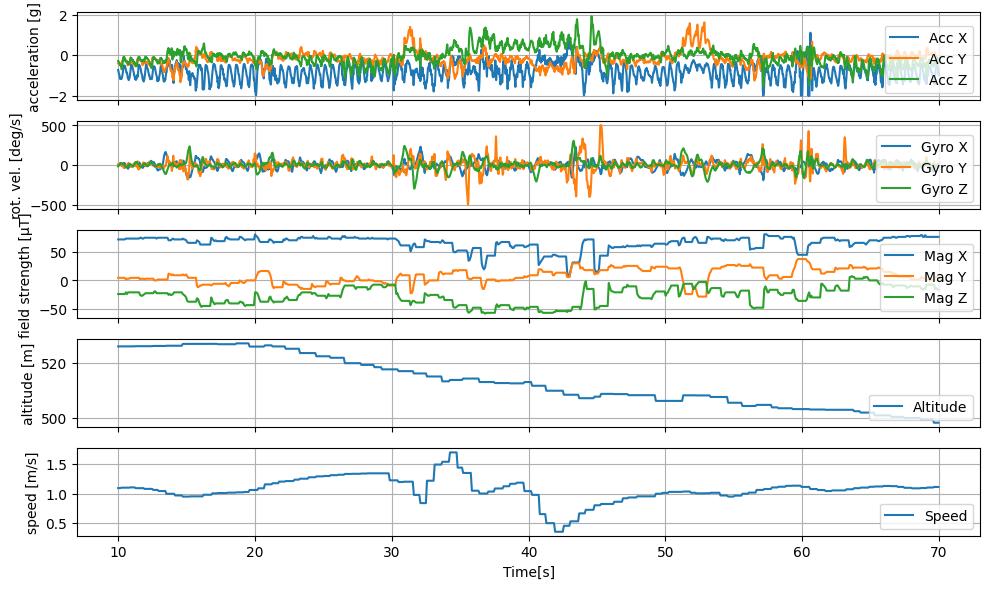

In [10]:
# How to Zoom In: use start_s and end_s to specify the time range in seconds
# start_s: start of the range you want to plot (in seconds since the start of the trace)
# end_s: end of the range you want to plot (in seconds since the start of the trace)
recording.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
             ylabels=['acceleration [g]', 'rot. vel. [deg/s]', 'field strength [µT]', 'altitude [m]', 'speed [m/s]'],
             labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['Altitude'], ['Speed']],
               start_s=10, end_s=70)

# Display GPS data

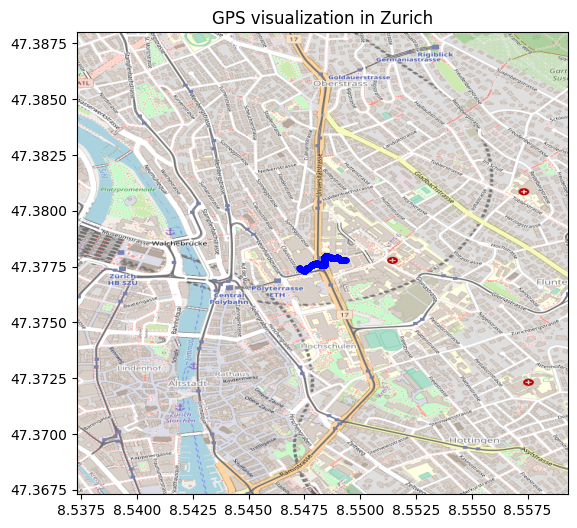

In [12]:
# Recording must contain gps data
assert('latitude' in recording.data and 'longitude' in recording.data)

plot_map_zurich = True

# Visualize the path of the trace
fig, ax = plt.subplots(figsize = (11,6))
ax.scatter(recording.data['longitude'].values, recording.data['latitude'].values, zorder=1, alpha= 0.9, c='b', s=10)
ax.set_title('Visualization of the path')

if plot_map_zurich:
    # Bounding coordinates for map
    BBox = (8.5373,8.5593,
            47.3673, 47.3880)
    # Load map of Zurich
    ruh_m = plt.imread('mapzurich.png')
    ax.set_title('GPS visualization in Zurich')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(ruh_m, zorder=0, extent = BBox)

# Generate computed traces

Small example that adds an accelerometer magnitude trace

<code>Trace.from_modified(cls, title: str, values: np.ndarray, timestamps: np.ndarray, time_offset: float = 0)</code> can be used to save a new or modified trace for the Recording object.

<code>title</code>: Title for this collection of data.<br>
<code>values</code>: modified values<br>
<code>timestamps</code>: array of timestamps, one timestamp per value, usually directly taken from the original data<br>
<code>offset</code>: optional offset in case the "raw_timestamps" should match the original data<br>

Note: This change is only executed locally and not saved to the pkl file. Everytime you reload your dataset, you have to re-execute this steps. Alternatively, you can save a copy of your modified Recording using <code>save_to_pkl</code> (please be careful not to introduce errors in your origninal training set).


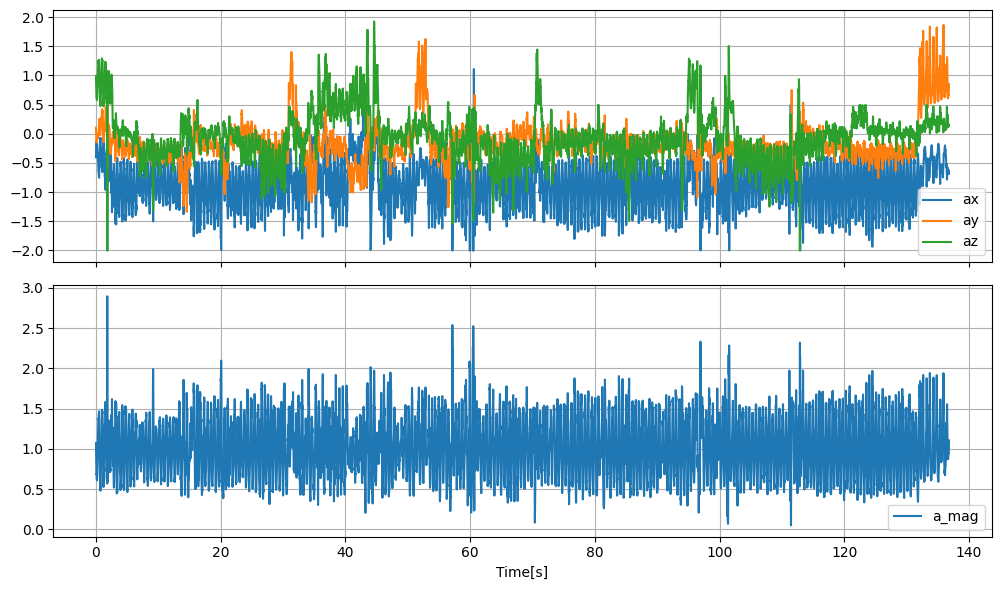

In [13]:
# Trace must contain lilygo accelerometer data
assert('ax' in recording.data and 'ay' in recording.data and 'az' in recording.data)
# And those traces must be of the same length
assert(len(recording.data['ax'].values) == len(recording.data['ay'].values)  and len(recording.data['ax'].values) == len(recording.data['az'].values) )

magn = (recording.data['ax'].values**2 + recording.data['ay'].values**2 + recording.data['az'].values**2)**0.5

recording.data['a_mag'] = Trace.from_modified('Accelerometer magnitude', magn, recording.data['ax'].timestamps, recording.data['ax'].raw_timestamps[0][1])

recording.plot([['ax', 'ay', 'az'], ['a_mag']])

# FYI: How Timestamps Are Handled (You Probably Don't Need This)

Every time the smartphone receives a package via Bluetooth from the LilyGo smartwatch, up to 16 sensor values are stored at once, together with the current timestamp. Therefore, not every sensor reading has a perfectly defined timestamp that is 100% accurate.

Each <code>Trace</code> contains a list of <code>raw_timestamps</code>, which are tuples of the type `(trace index, timestamp)`.

The timestamps are standard Unix timestamps in milliseconds.

For example, the first two entries indicate "The 0th value arrived at 1645184293057, the 16th value at 1645184293144."

In [14]:
recording.data["ax"].raw_timestamps

[(0, 1645184293057),
 (16, 1645184293144),
 (32, 1645184293221),
 (48, 1645184293308),
 (64, 1645184293346),
 (80, 1645184293432),
 (96, 1645184293510),
 (112, 1645184293593),
 (128, 1645184293675),
 (144, 1645184293760),
 (160, 1645184293841),
 (176, 1645184293923),
 (192, 1645184294005),
 (208, 1645184294089),
 (224, 1645184294170),
 (240, 1645184294255),
 (256, 1645184294336),
 (272, 1645184294421),
 (288, 1645184294501),
 (304, 1645184294586),
 (320, 1645184294666),
 (336, 1645184294708),
 (352, 1645184294793),
 (368, 1645184294872),
 (384, 1645184294956),
 (400, 1645184295040),
 (416, 1645184295122),
 (432, 1645184295203),
 (448, 1645184295284),
 (464, 1645184295367),
 (480, 1645184295457),
 (496, 1645184295534),
 (512, 1645184295615),
 (528, 1645184295697),
 (544, 1645184295781),
 (560, 1645184295862),
 (576, 1645184295944),
 (592, 1645184296027),
 (608, 1645184296070),
 (624, 1645184296153),
 (640, 1645184296233),
 (656, 1645184296315),
 (672, 1645184296406),
 (688, 164518429648

In [15]:
recording.data['ax'].raw_timestamps[-1][1]-recording.data['ax'].raw_timestamps[0][1]

136789

The LilyGo uses a FIFO with a constant sampling rate, so it should be a fair assumption, that the delay between two consecutive readings is always the same.

By default the <code>Trace.timestamps</code> array is linearly interpolated between the first and the last timestamp (<code>linspace(0, last_timestamp, num=len(values))</code>)

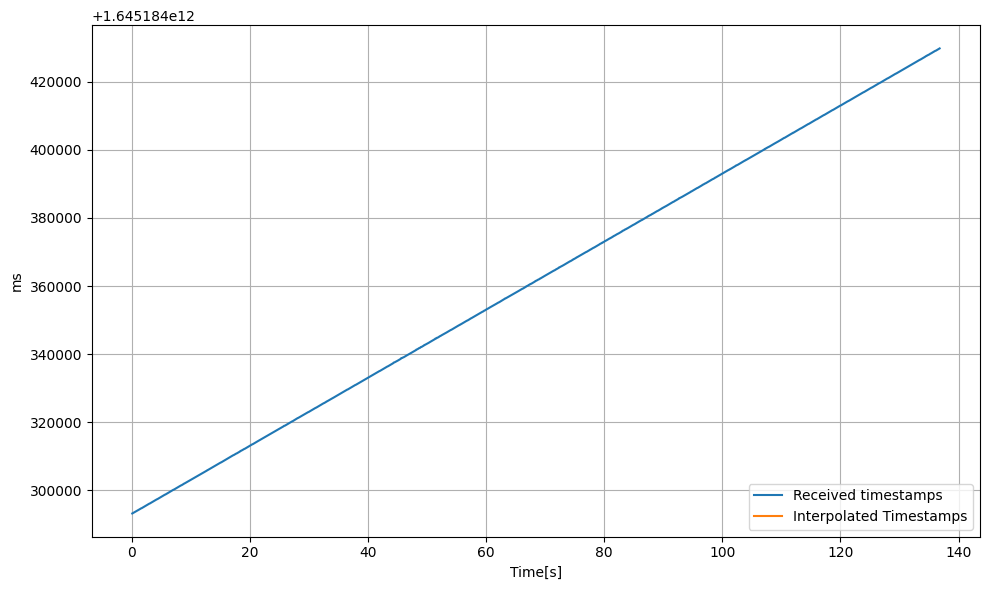

In [16]:
# Compare "ideal" interpolated timestamps against actual received timestamps
recording.data['ideal_ts'] = Trace('ideal_ts', 
                                   [recording.data['timestamp'].values[0], recording.data['timestamp'].values[-1]], 
                                   [(0,recording.data['timestamp'].values[0]), 
                                    (len(recording.data['timestamp'].values), recording.data['timestamp'].values[-1])])
recording.plot(['timestamp', 'ideal_ts'], labels=['Received timestamps', 'Interpolated Timestamps'], ylabels=['ms'])

NameError: name 'Recording' is not defined